In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris = tfds.load('iris', split='train')
print(iris)
print(next(iris.as_numpy_iterator()))

<PrefetchDataset shapes: {features: (4,), label: ()}, types: {features: tf.float32, label: tf.int64}>
{'features': array([5.1, 3.4, 1.5, 0.2], dtype=float32), 'label': 0}


In [3]:
Xy_train_ori = iris.take(100)
Xy_test_ori = iris.skip(100)

In [4]:
#https://stackoverflow.com/questions/62931610/warningtensorflowautograph-could-not-transform-function-format-example-at

In [5]:
def transform_data(x):
    return (x['features'], x['label'])

Xy_train = Xy_train_ori.map(tf.autograph.experimental.do_not_convert(transform_data))
Xy_test = Xy_test_ori.map(tf.autograph.experimental.do_not_convert(transform_data))
print(next(Xy_train.as_numpy_iterator()))

(array([5.1, 3.4, 1.5, 0.2], dtype=float32), 0)


In [6]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(16, activation='sigmoid', name='fc1'),
    tf.keras.layers.Dense(3, name='fc2', activation='softmax')
    ])

model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 16)                80        
_________________________________________________________________
fc2 (Dense)                  (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [7]:
print(model.layers)

[<tensorflow.python.keras.layers.core.Dense object at 0x000001CF833AE880>, <tensorflow.python.keras.layers.core.Dense object at 0x000001CF833AEC10>]


In [8]:
weights, bias = model.layers[0].get_weights()

print(weights.shape)
print(bias.shape)
print(weights)
print(bias)

(4, 16)
(16,)
[[-0.01675868 -0.3189776  -0.52963585  0.23317498  0.29925007  0.21352178
  -0.4335507  -0.08275157 -0.3299122   0.35555196 -0.42360437  0.4634477
  -0.40506738  0.42112893 -0.08392724  0.15655935]
 [ 0.09466571  0.08830124 -0.37941223 -0.23184708 -0.34275156 -0.13051122
   0.25807357  0.12233531 -0.39713854 -0.22460052  0.09378451 -0.19149745
   0.11811966  0.34367377 -0.06292307  0.27262414]
 [-0.47148523  0.2534535  -0.2931335   0.10949886 -0.20939806 -0.00400877
   0.05026591 -0.35264143  0.5474963  -0.23142567 -0.3648819  -0.01713777
  -0.49215457 -0.3222316   0.46473777  0.44800943]
 [-0.3808296   0.05534405 -0.45390713 -0.12028533  0.12239641  0.50552785
   0.4328357  -0.08509913  0.02391195  0.07001197  0.02868259 -0.42511645
  -0.23089314 -0.45553818 -0.24443412 -0.41595444]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
Xy_train_batch = Xy_train.shuffle(100).batch(batch_size=3)

history = model.fit(Xy_train_batch,
        epochs=100, 
        verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 402us/step - loss: 1.1169 - accuracy: 0.3500
Epoch 2/100
34/34 [==============================] - 0s 412us/step - loss: 1.0493 - accuracy: 0.4600
Epoch 3/100
34/34 [==============================] - 0s 382us/step - loss: 1.0097 - accuracy: 0.6600
Epoch 4/100
34/34 [==============================] - 0s 398us/step - loss: 0.9737 - accuracy: 0.6900
Epoch 5/100
34/34 [==============================] - 0s 412us/step - loss: 0.9378 - accuracy: 0.6900
Epoch 6/100
34/34 [==============================] - 0s 382us/step - loss: 0.9008 - accuracy: 0.6900
Epoch 7/100
34/34 [==============================] - 0s 454us/step - loss: 0.8614 - accuracy: 0.6900
Epoch 8/100
34/34 [==============================] - 0s 412us/step - loss: 0.8272 - accuracy: 0.6800
Epoch 9/100
34/34 [==============================] - 0s 412us/step - loss: 0.7911 - accuracy: 0.6800
Epoch 10/100
34/34 [==============================] - 0s 498us/step - loss: 0.7624 - accura

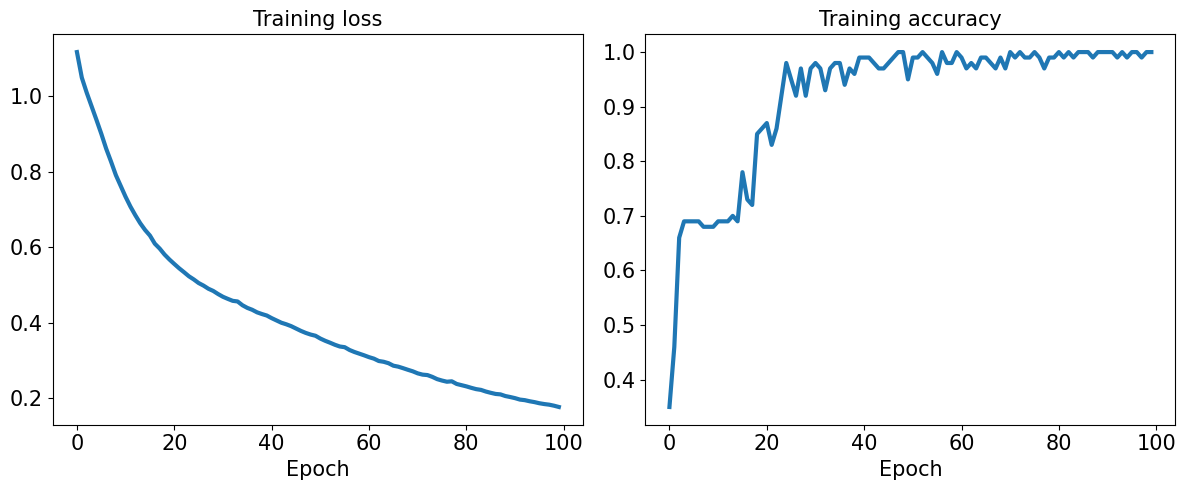

In [10]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
#plt.savefig('ch13-cls-learning-curve.pdf')

plt.show()

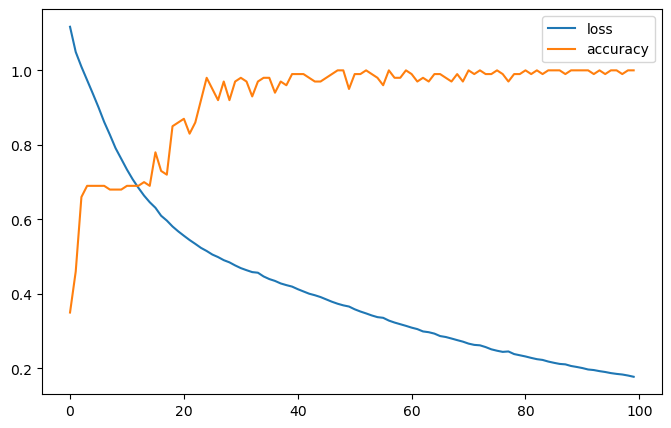

In [11]:
temp = pd.DataFrame(history.history)
temp.plot(figsize=(8,5))
plt.show()

In [12]:
#Batch size does not matter.
results = model.evaluate(Xy_test.batch(3), verbose=0)
print(f'Test loss: {results[0]:.4f}   Test Acc.: {results[1]:.4f}')

Test loss: 0.2004   Test Acc.: 0.9200


In [13]:
#Batch size does not matter.
y_pred = model.predict(Xy_test.batch(2), verbose=0)
print(y_pred.shape)

(50, 3)


In [14]:
print(y_pred)

[[8.45843111e-04 1.39868394e-01 8.59285772e-01]
 [2.05011130e-03 2.74036288e-01 7.23913610e-01]
 [9.76485014e-01 2.35082824e-02 6.65763537e-06]
 [8.66652699e-04 1.55646652e-01 8.43486667e-01]
 [3.26366201e-02 8.50285232e-01 1.17078163e-01]
 [6.74836338e-04 1.24224029e-01 8.75101089e-01]
 [2.23938953e-02 8.15174341e-01 1.62431717e-01]
 [9.77174699e-01 2.28192117e-02 6.09955850e-06]
 [2.28437614e-02 7.97310054e-01 1.79846272e-01]
 [9.73151386e-01 2.68407073e-02 7.86201053e-06]
 [4.33431385e-04 8.93450975e-02 9.10221457e-01]
 [6.26238412e-04 1.20617665e-01 8.78756046e-01]
 [9.71159220e-01 2.88321320e-02 8.68075404e-06]
 [8.03695468e-04 1.54726431e-01 8.44469845e-01]
 [9.76730764e-01 2.32624635e-02 6.69882820e-06]
 [2.70276908e-02 8.34050655e-01 1.38921589e-01]
 [1.39720214e-03 2.12135181e-01 7.86467612e-01]
 [9.78819549e-01 2.11754423e-02 5.05498838e-06]
 [1.23488752e-03 1.93149269e-01 8.05615842e-01]
 [4.41378541e-03 4.43978965e-01 5.51607251e-01]
 [9.83866930e-01 1.61292143e-02 3.917885